In [1]:
%matplotlib inline

In [2]:
import os, re
import pandas as pd
import numpy as np

In [3]:
wdir = "./weather/"
hash_date = {}
for fn in os.listdir(wdir):
    if re.search(".csv", fn):
        wfn = wdir+fn
        stat_date = fn.split(".")[0]
        stat = stat_date.split("-")[0]
        mdate = "-".join(stat_date.split("-")[1:])
        
        # check 是否是有 date 
        if mdate in hash_date:
            1
        else:
            hash_date[mdate] = {}
        
        # check 是否是有 stat 
        if stat in hash_date[mdate]:
            1
        else:
            hash_date[mdate][stat] = pd.read_csv(wfn, encoding="UTF8")


In [4]:
print ", ".join(hash_date.keys())

2014-09, 2014-08, 2014-05, 2014-04, 2014-07, 2014-06, 2014-01, 2014-03, 2014-02, 2013-04, 2013-08, 2013-09, 2015-10, 2015-11, 2013-05, 2013-06, 2013-07, 2013-01, 2013-02, 2013-03, 2015-12, 2016-10, 2016-11, 2016-12, 2015-06, 2015-07, 2015-04, 2015-05, 2015-02, 2015-03, 2015-01, 2014-12, 2014-10, 2014-11, 2015-08, 2015-09, 2013-12, 2013-11, 2013-10, 2016-07, 2016-06, 2016-05, 2016-04, 2016-03, 2016-02, 2016-01, 2016-00, 2016-09, 2016-08


In [5]:
no_stat = [ '467620', '467300', '467550', '466950', 'C0S730','C0H9C0' ]

df_weather = pd.DataFrame(columns=('date', 'avg_max_temp', 'avg_min_temp', 'avg_rain', 'max_wind'))
idx = 0

for month in hash_date.keys()[:]:
    for dd in hash_date[month][ hash_date[month].keys()[0] ].index:
        
        max_wind = 0
        avg_max_temp = []
        avg_min_temp = []
        avg_rain = []
        for stat in hash_date[month].keys()[:]:
            
            if stat in no_stat:
                continue 
                
            mpd = hash_date[month][stat]
            if dd in mpd.index:
                rows = [ x if not x == u'0.0' else 0. for x in mpd.loc[dd]]
                
                if rows[17] > max_wind:
                    max_wind = rows[17]
                    if max_wind>10:
                        print stat, max_wind
                avg_max_temp.append( rows[9])
                avg_min_temp.append( rows[11])
                avg_rain.append( rows[22])
        df_weather.loc[idx] = ["%s-%s"%(month, dd), np.average(avg_max_temp), np.average(avg_min_temp), np.average(avg_rain), max_wind]
        idx = idx + 1

/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


467050 10.3
467050 10.3
467770 10.1
467050 10.6
467050 12.6
467050 10.7
467050 10.1
467050 11.4
467590 11.6
467050 11.0
467050 11.7
467050 11.5
467050 10.2
467050 11.9
467770 10.1
467050 11.0
467050 10.3
467050 10.1
467050 10.3
466910 10.8
467050 11.5
467050 10.4
467050 10.1
467050 10.3
467050 11.0
467050 11.5
467050 10.3
467050 10.2
467050 10.1
467050 11.2
467050 11.0
467050 10.5
467050 11.7
467050 11.6
467770 11.1
467050 11.0
467770 11.2
467050 11.5
467350 11.1
467060 16.3
467770 10.2
C0M710 10.1
467060 13.2
467050 14.6
467770 14.7
467050 10.6
C0D560 10.1
467050 10.2
467660 11.7
C0X310 12.0
467050 11.3
467050 10.3
467050 10.2
467050 11.0
467050 11.2
467050 11.2
C0K291 10.1
467050 10.9
467770 11.9
467050 10.2


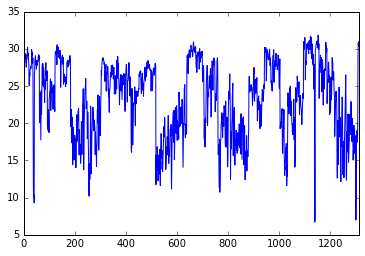

In [6]:
df_weather['avg_max_temp'].plot()

In [7]:
df_weather.to_csv("testing_weather.csv")

In [8]:
df_weather = pd.read_csv("testing_weather.csv")

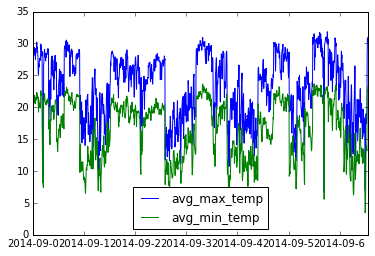

In [9]:
ax = df_weather[['avg_max_temp', 'avg_min_temp']].plot()
ax.set_xticklabels(df_weather.date)

In [10]:
df_weather['avg_max_temp'].describe()

count    1312.000000
mean       23.253370
std         4.979950
min         6.702500
25%        19.318690
50%        24.093119
75%        27.524567
max        31.835833
Name: avg_max_temp, dtype: float64

In [11]:
df_weather['avg_min_temp'].describe()

count    1312.000000
mean       16.604408
std         4.490012
min         3.461345
25%        12.635548
50%        17.508903
75%        20.493597
max        23.673333
Name: avg_min_temp, dtype: float64

In [12]:
df_weather['avg_rain'].describe()

count    1312.000000
mean        6.025007
std        13.125653
min         0.000000
25%         0.393332
50%         1.760844
75%         6.229387
max       172.504348
Name: avg_rain, dtype: float64

In [13]:
df_weather['max_wind'].describe()

count    1312.000000
mean        5.865930
std         2.250408
min         2.100000
25%         4.000000
50%         5.500000
75%         7.500000
max        16.300000
Name: max_wind, dtype: float64

In [14]:
def label_max_temp(atemp):
    low_bound = df_weather['avg_max_temp'].describe()['25%']
    high_bound = df_weather['avg_max_temp'].describe()['75%']
    
    if atemp < low_bound:
        return "L"
    if atemp >= low_bound and atemp < high_bound:
        return "M"
    if atemp > high_bound:
        return "H"

In [15]:
def label_min_temp(atemp):
    low_bound = df_weather['avg_min_temp'].describe()['25%']
    high_bound = df_weather['avg_min_temp'].describe()['75%']
    
    if atemp < low_bound:
        return "L"
    if atemp >= low_bound and atemp < high_bound:
        return "M"
    if atemp > high_bound:
        return "H"

In [16]:
def label_avg_rain(atemp):
    low_bound = df_weather['avg_rain'].describe()['25%']
    high_bound = df_weather['avg_rain'].describe()['75%']
    
    if atemp < low_bound:
        return "L"
    if atemp >= low_bound and atemp < high_bound:
        return "M"
    if atemp > high_bound:
        return "H"

In [17]:
def label_max_wind(atemp):
    low_bound = df_weather['max_wind'].describe()['25%']
    high_bound = df_weather['max_wind'].describe()['75%']
    
    if atemp < low_bound:
        return "L"
    if atemp >= low_bound and atemp < high_bound:
        return "M"
    if atemp > high_bound:
        return "H"

In [18]:
df_weather['lbl_max_temp'] = [label_max_temp(x) for x in df_weather['avg_max_temp']]

In [19]:
df_weather['lbl_min_temp'] = [label_min_temp(x) for x in df_weather['avg_min_temp']]

In [20]:
df_weather['lbl_avg_rain'] = [label_avg_rain(x) for x in df_weather['avg_rain']]

In [21]:
df_weather['lbl_max_wind'] = [label_max_wind(x) for x in df_weather['max_wind']]

In [22]:
df_weather['max_wind'].describe()

count    1312.000000
mean        5.865930
std         2.250408
min         2.100000
25%         4.000000
50%         5.500000
75%         7.500000
max        16.300000
Name: max_wind, dtype: float64

In [23]:
df_weather['lbl_max_wind'].value_counts()

M    653
L    327
H    319
Name: lbl_max_wind, dtype: int64

In [24]:
df_weather.sort_values(['date'])

,Unnamed: 0,date,avg_max_temp,avg_min_temp,avg_rain,max_wind,lbl_max_temp,lbl_min_temp,lbl_avg_rain,lbl_max_wind
517,517,2013-01-0,11.743158,7.882105,3.627368,3.8,L,L,M,L
518,518,2013-01-1,15.709474,10.197895,0.774737,5.5,L,L,M,M
527,527,2013-01-10,15.695789,9.425263,2.901053,6.2,L,L,M,M
528,528,2013-01-11,14.658947,11.333684,10.854737,8.3,L,L,H,H
529,529,2013-01-12,14.546316,10.003158,11.464211,6.6,L,L,H,M
530,530,2013-01-13,13.172632,8.042105,0.397895,8.3,L,L,M,H
531,531,2013-01-14,16.256842,7.766316,0.005263,5.2,L,L,L,M
532,532,2013-01-15,16.474737,8.344211,2.792632,5.0,L,L,M,M
533,533,2013-01-16,12.858947,7.944211,1.929474,8.7,L,L,M,H
534,534,2013-01-17,11.618947,7.433684,0.176842,7.9,L,L,L,H
